# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

To support the used car dealership in understanding price determinants, we will approach this as a supervised regression problem. Using historical data on used car sales, including features such as make, model, year, mileage, transmission type, and fuel type, we aim to train a predictive model that estimates the price of a vehicle. 
Additionally, we will perform feature importance analysis to identify which variables most significantly influence price, thereby providing actionable insights for the dealership’s pricing and inventory strategy.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

1. load and inspect data
2. check for missing values
3. explore feature distributions
4. identify outliers and anomalies
5. check for duplicates
6. understand relationships

In [84]:
import pandas as pd

vehicles = pd.read_csv('data/vehicles.csv')

vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [85]:
vehicles.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [86]:
# Remove invalid manufacturer
filtered_vehicles = vehicles[vehicles['manufacturer'].notna()]
print(filtered_vehicles.shape)

# deduplicate 
duplicates = filtered_vehicles.duplicated()
filtered_vehicles = filtered_vehicles[~duplicates]
print(filtered_vehicles.shape)
filtered_vehicles.head()

(409234, 18)
(409234, 18)


,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
27,7316814884,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,3GTP1VEC4EG551563,NaN,NaN,pickup,white,al
28,7316814758,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,1GCSCSE06AZ123805,NaN,NaN,pickup,blue,al
29,7316814989,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,3GCPWCED5LG130317,NaN,NaN,pickup,red,al
30,7316743432,auburn,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,5TFRM5F17HX120972,NaN,NaN,pickup,red,al
31,7316356412,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,NaN,rwd,full-size,truck,black,al


### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

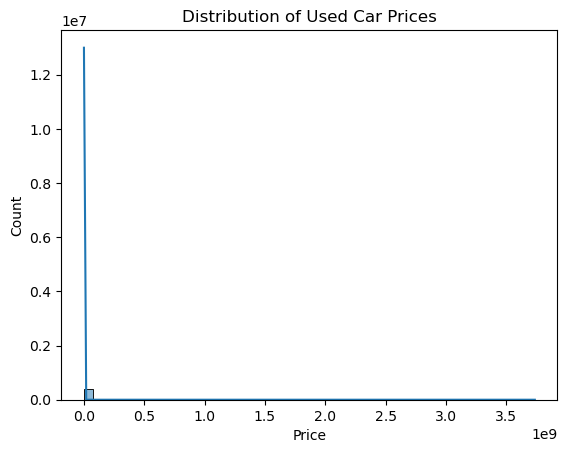

Maximum Price: $3,736,928,711.00
Minimum Price: $0.00


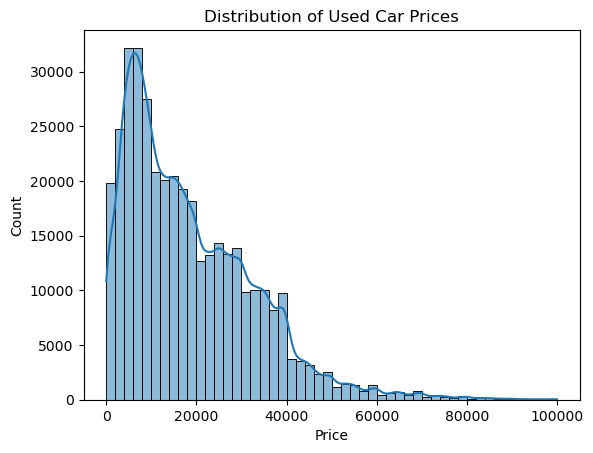

In [88]:
#Goal: Understand the price distribution and decide if transformation is needed.
sns.histplot(filtered_vehicles['price'], bins=50, kde=True)
plt.title('Distribution of Used Car Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

max_price = filtered_vehicles['price'].max()
print(f"Maximum Price: ${max_price:,.2f}")

min_price = filtered_vehicles['price'].min()
print(f"Minimum Price: ${min_price:,.2f}")

# drop off rows with price = 0 and price > 1,000,000 as these are outliner data
used_cars = filtered_vehicles[(filtered_vehicles['price'] < 100000) & (filtered_vehicles['price'] != 0)]

sns.histplot(used_cars['price'], bins=50, kde=True)
plt.title('Distribution of Used Car Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

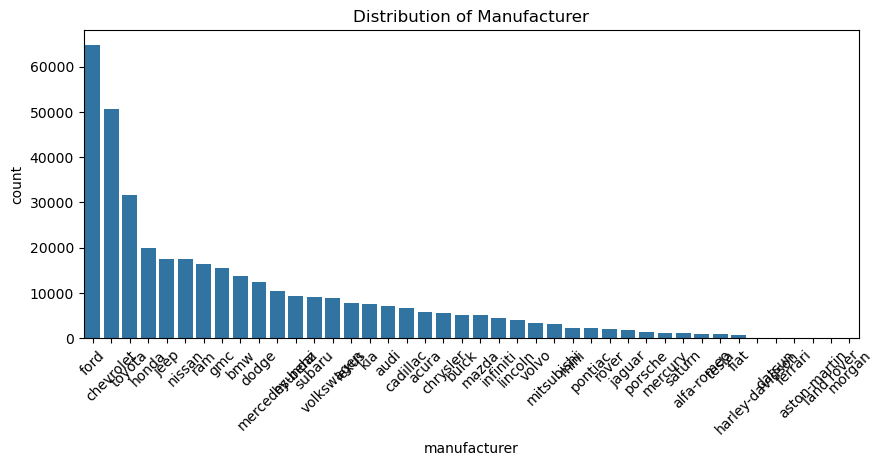

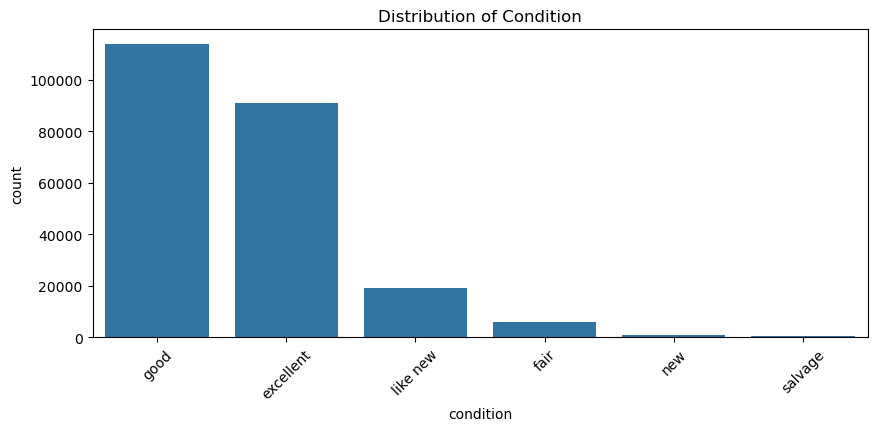

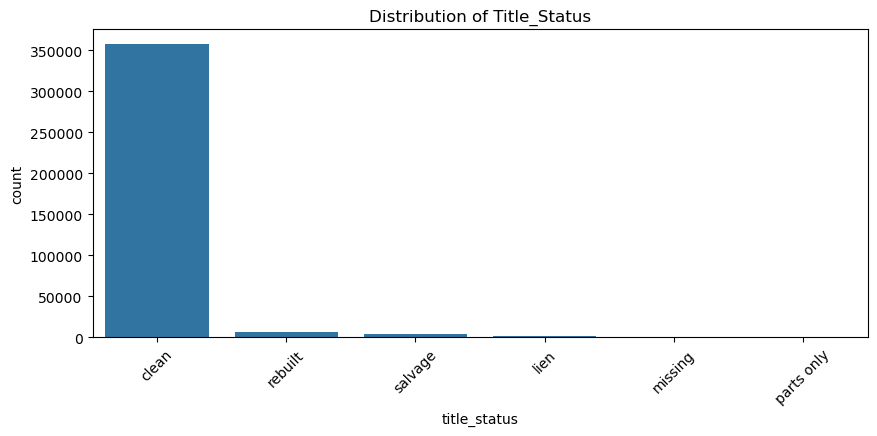

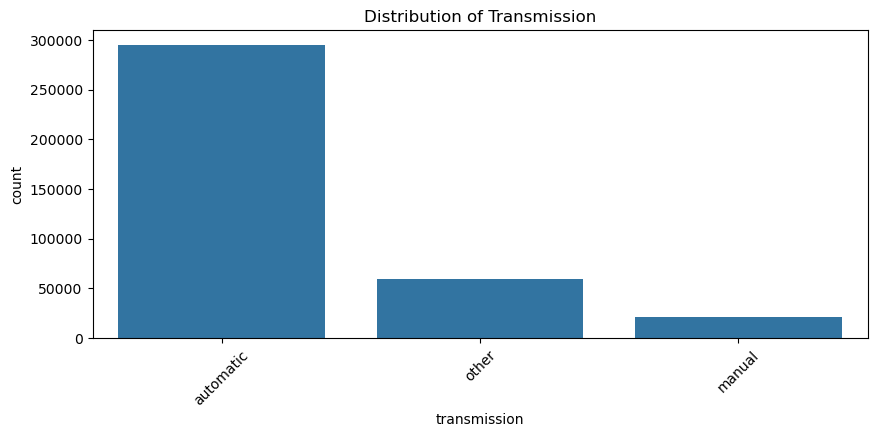

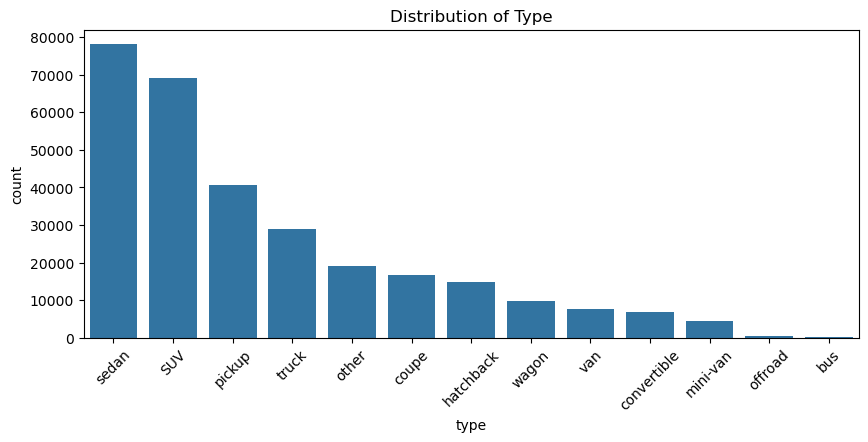

(376531, 18)


,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
27,7316814884,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,3GTP1VEC4EG551563,NaN,NaN,pickup,white,al
28,7316814758,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,1GCSCSE06AZ123805,NaN,NaN,pickup,blue,al
29,7316814989,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,3GCPWCED5LG130317,NaN,NaN,pickup,red,al
30,7316743432,auburn,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,5TFRM5F17HX120972,NaN,NaN,pickup,red,al
31,7316356412,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,NaN,rwd,full-size,truck,black,al


In [89]:
#Goal: Understand the frequency of each category.

categorical_cols = ['manufacturer', 'condition', 'title_status', 'transmission', 'type']
for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=used_cars, x=col, order=used_cars[col].value_counts().index)
    plt.title(f'Distribution of {col.title()}')
    plt.xticks(rotation=45)
    plt.show()

# drop off unused data such as parts 
values_to_exclude = ['missing', 'parts only']
used_cars = used_cars[~used_cars['title_status'].isin(values_to_exclude)]
print(used_cars.shape)
used_cars.head()

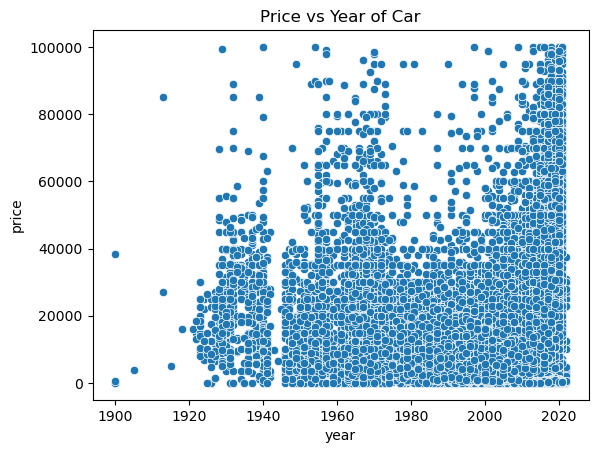

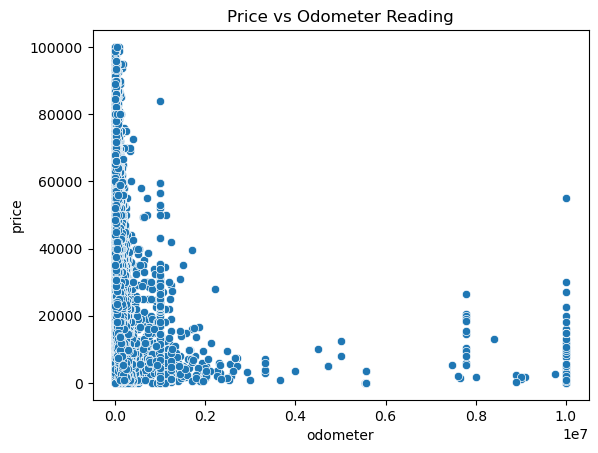

max_odometer: 10000000.0
min_odometer: 0.0


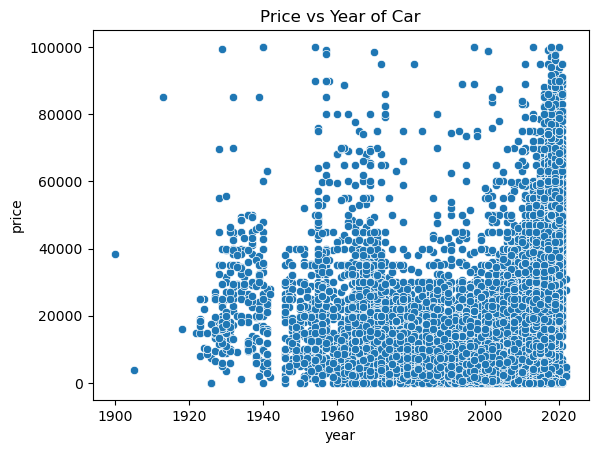

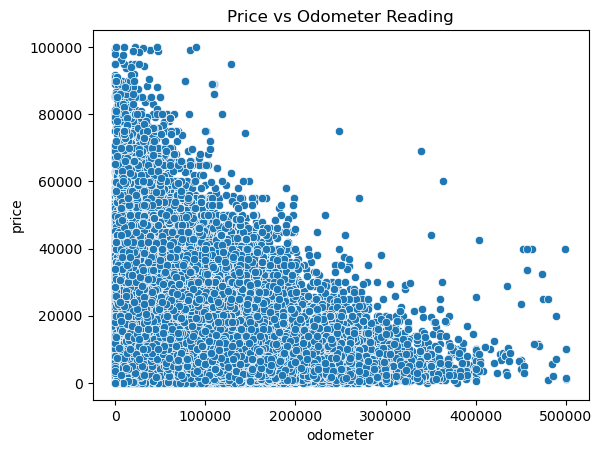

In [90]:
#Goal: See how price varies with year, odometer, or number of cylinders.
# Price vs Year
sns.scatterplot(data=used_cars, x='year', y='price')
plt.title('Price vs Year of Car')
plt.show()

# Price vs Odometer
sns.scatterplot(data=used_cars, x='odometer', y='price')
plt.title('Price vs Odometer Reading')
plt.show()

max_odometer = used_cars['odometer'].max()
print(f"max_odometer: {max_odometer}")

min_odometer = used_cars['odometer'].min()
print(f"min_odometer: {min_odometer}")

used_cars_2 = used_cars[used_cars['odometer'] <= 500000]
columns_to_check = ['year', 'odometer', 'manufacturer', 'condition', 'cylinders', 'title_status', 'transmission', 'type']

used_cars_2 = used_cars_2.dropna(subset=columns_to_check)

sns.scatterplot(data=used_cars_2, x='year', y='price')
plt.title('Price vs Year of Car')
plt.show()

# Price vs Odometer
sns.scatterplot(data=used_cars_2, x='odometer', y='price')
plt.title('Price vs Odometer Reading')
plt.show()

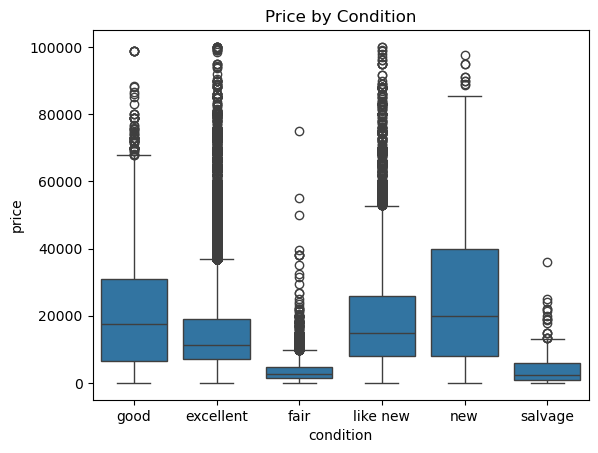

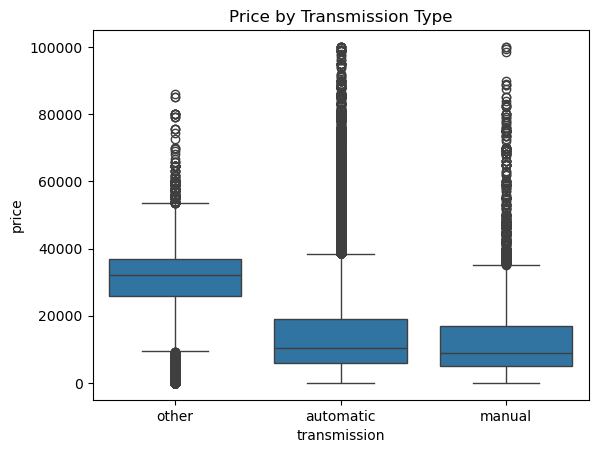

In [91]:
# Goal: Explore how price varies across categories (e.g., condition, transmission).

sns.boxplot(data=used_cars_2, x='condition', y='price')
plt.title('Price by Condition')
plt.show()

sns.boxplot(data=used_cars_2, x='transmission', y='price')
plt.title('Price by Transmission Type')
plt.show()

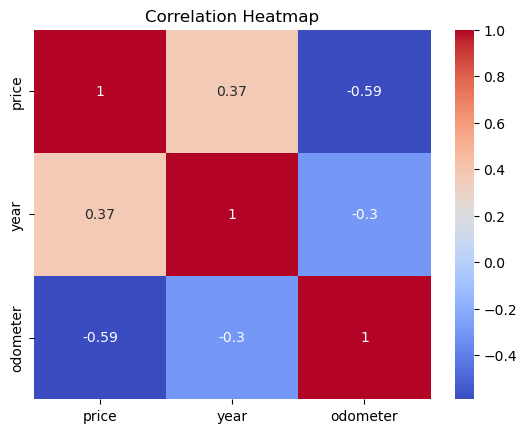

In [92]:
#Goal: Identify correlation between numerical variables.

numeric_cols = ['price', 'year', 'odometer']
sns.heatmap(used_cars_2[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

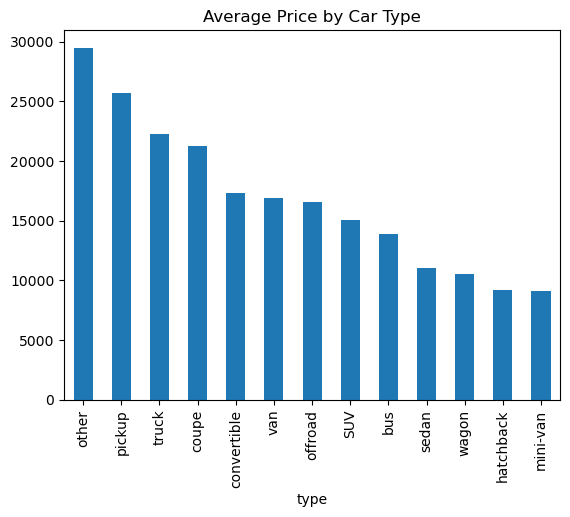

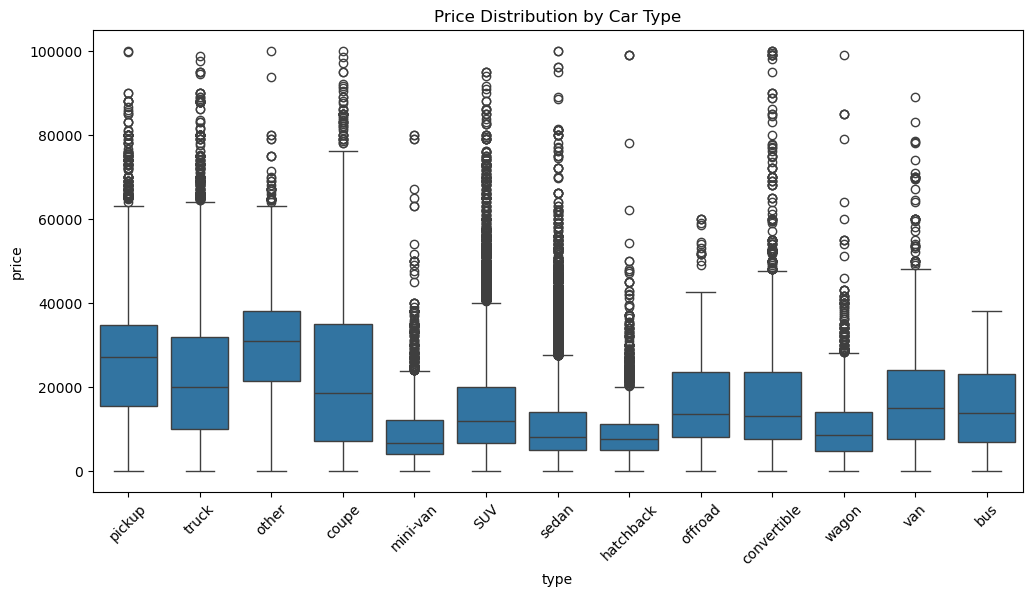

In [93]:
used_cars_3 = used_cars_2
used_cars_3.groupby('type')['price'].mean().sort_values(ascending=False).plot(kind='bar', title='Average Price by Car Type')


plt.figure(figsize=(12, 6))
sns.boxplot(data=used_cars_3, x='type', y='price')
plt.xticks(rotation=45)
plt.title('Price Distribution by Car Type')
plt.show()

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [94]:
data = used_cars_2

X = data.drop(['price', 'region', 'id', 'model', 'fuel', 'VIN', 'drive', 'size', 'paint_color', 'state'], axis=1)  # Drop target and irrelevant features
y = data['price']

X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142242 entries, 27 to 426878
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          142242 non-null  float64
 1   manufacturer  142242 non-null  object 
 2   condition     142242 non-null  object 
 3   cylinders     142242 non-null  object 
 4   odometer      142242 non-null  float64
 5   title_status  142242 non-null  object 
 6   transmission  142242 non-null  object 
 7   type          142242 non-null  object 
dtypes: float64(2), object(6)
memory usage: 9.8+ MB


In [95]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [96]:
#handle categorical variables and scale numerical features. Use a ColumnTransformer.
numeric_features = ['year', 'odometer']
categorical_features = ['manufacturer', 'condition', 'cylinders', 'title_status', 'transmission', 'type']

linear_numeric_transformer = Pipeline(steps=[
    ('fillna', SimpleImputer(strategy='mean'))  # Handle missing numeric values
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore')),  # One-hot encode categorical features
])

linear_preprocessor = ColumnTransformer(
    transformers=[
        ('num', linear_numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [97]:
# try linear regression model

lr_pipeline = Pipeline(steps=[('preprocessor', linear_preprocessor), ('regressor', LinearRegression())])
lr_pipeline.fit(X_train, y_train)

# Predict and evaluate
lr_pipeline_y_pred = lr_pipeline.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_pipeline_y_pred)

print(f"Lineaer regression Mean Squared Error on Test Set: {lr_mse}")
scores = cross_val_score(lr_pipeline, X, y, cv=5, scoring='neg_root_mean_squared_error')
print("Linear Regression RMSE:", -scores.mean())

Lineaer regression Mean Squared Error on Test Set: 73308846.72476661
Linear Regression RMSE: 8625.401074483665


In [98]:
# try Ridge regression model with different alpha

ridge_pipeline = Pipeline(steps=[
    ('preprocessor', linear_preprocessor),
    ('regressor', Ridge())  # We'll tune alpha here
])

param_grid = {
    'regressor__alpha': np.logspace(-3, 4, 20)  # From 0.001 to 10000
}
ridge_grid_search = GridSearchCV(ridge_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
ridge_grid_search.fit(X_train, y_train)
print(f"Best alpha: {ridge_grid_search.best_params_['regressor__alpha']}")
print(f"Best CV MSE: {-ridge_grid_search.best_score_:.2f}")


Best alpha: 10000.0
Best CV MSE: 117675107.35


In [99]:
# try Lasso regression model

lasso_pipeline = Pipeline(steps=[
    ('preprocessor', linear_preprocessor),
    ('regressor', Lasso(max_iter=10000, random_state = 42))
])

lasso_pipeline.fit(X_train, y_train)

# Predict and evaluate
lasso_pipeline_y_pred = lasso_pipeline.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_pipeline_y_pred)

print(f"Lasso regression Mean Squared Error on Test Set: {lasso_mse}")
scores = cross_val_score(lasso_pipeline, X, y, cv=5, scoring='neg_root_mean_squared_error')
print("Lasso Regression RMSE:", -scores.mean())

Lasso regression Mean Squared Error on Test Set: 68232301.0075118
Lasso Regression RMSE: 8365.411204799908


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

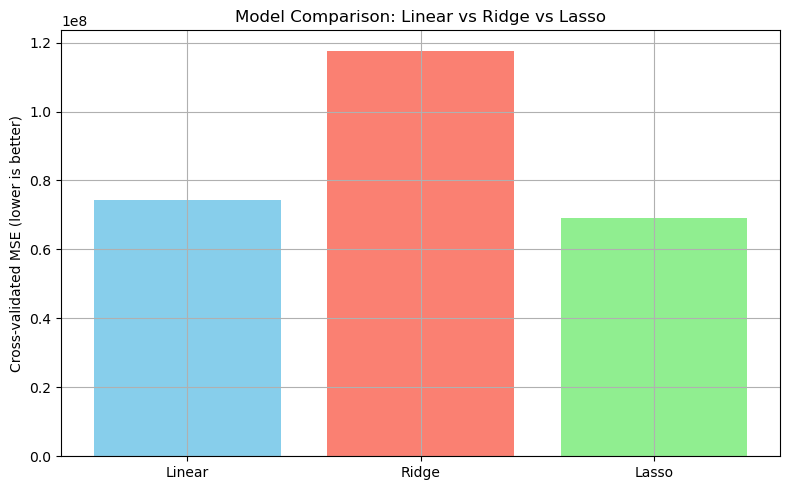

In [100]:
# Compare and visualize three models

models = {
    'Linear': LinearRegression(),
    'Ridge': Ridge(alpha=10000),
    'Lasso': Lasso(max_iter=10000, random_state = 42)
}

# Score dictionary
cv_scores = {}

for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', linear_preprocessor),
        ('regressor', model)
    ])
    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_scores[name] = -scores.mean()  # convert to positive MSE

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(cv_scores.keys(), cv_scores.values(), color=['skyblue', 'salmon', 'lightgreen'])
plt.ylabel('Cross-validated MSE (lower is better)')
plt.title('Model Comparison: Linear vs Ridge vs Lasso')
plt.grid(True)
plt.tight_layout()
plt.show()

In [101]:
# Trying PolynomialFeatures (degree = 2)

poly_numeric_transformer = Pipeline(steps=[
    ('fillna', SimpleImputer(strategy='mean')),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore')),  # One-hot encode categorical features
])

poly_preprocessor = ColumnTransformer(
    transformers=[
        ('num', poly_numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [102]:
# find best alpha for Ridge

poly_ridge_pipeline = Pipeline(steps=[
    ('preprocessor', poly_preprocessor),
    ('regressor', Ridge())  # We'll tune alpha here
])

param_grid = {
    'regressor__alpha': np.logspace(-3, 4, 20)  # From 0.001 to 10000
}
poly_ridge_grid_search = GridSearchCV(poly_ridge_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
poly_ridge_grid_search.fit(X_train, y_train)
print(f"Best alpha: {poly_ridge_grid_search.best_params_['regressor__alpha']}")
print(f"Best CV MSE: {-poly_ridge_grid_search.best_score_:.2f}")

Best alpha: 0.00545559478116852
Best CV MSE: 55783638.84


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2074387924028.609, tolerance: 1433570967.757321
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2044359691691.7732, tolerance: 1423093626.013809
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2078709955015.9424, tolerance: 1431399785.629228
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descen

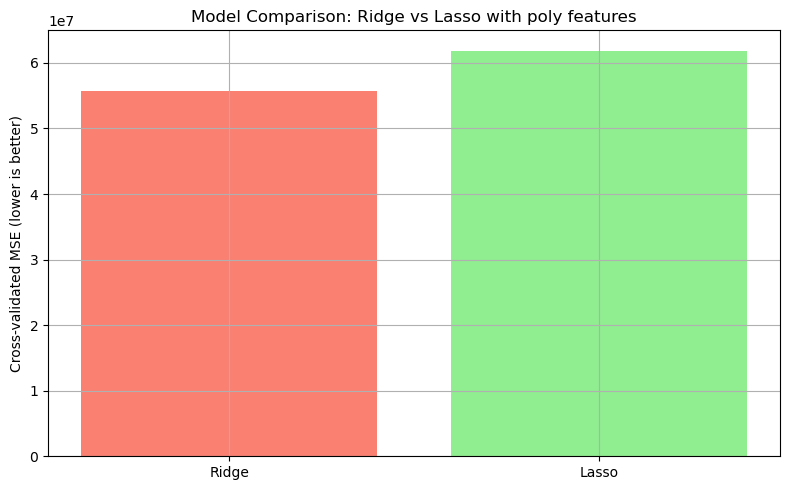

In [103]:
# Compare and visualize two models with poly features

models = {
    'Ridge': Ridge(alpha=0.0055),
    'Lasso': Lasso(max_iter=10000, random_state = 42)
}

# Score dictionary
cv_scores = {}

for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', poly_preprocessor),
        ('regressor', model)
    ])
    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_scores[name] = -scores.mean()  # convert to positive MSE

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(cv_scores.keys(), cv_scores.values(), color=['salmon', 'lightgreen'])
plt.ylabel('Cross-validated MSE (lower is better)')
plt.title('Model Comparison: Ridge vs Lasso with poly features')
plt.grid(True)
plt.tight_layout()
plt.show()

In [104]:
# Trying PolynomialFeatures (degree = 3)

poly3_numeric_transformer = Pipeline(steps=[
    ('fillna', SimpleImputer(strategy='mean')),
    ('poly', PolynomialFeatures(degree=3, include_bias=False)),
    ('scaler', StandardScaler())
])

poly3_preprocessor = ColumnTransformer(
    transformers=[
        ('num', poly3_numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

poly3_ridge_pipeline = Pipeline(steps=[
    ('preprocessor', poly_preprocessor),
    ('regressor', Ridge())  # We'll tune alpha here
])

param_grid = {
    'regressor__alpha': np.logspace(-3, 4, 20)  # From 0.001 to 10000
}
poly3_ridge_grid_search = GridSearchCV(poly3_ridge_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
poly3_ridge_grid_search.fit(X_train, y_train)
print(f"Best alpha: {poly3_ridge_grid_search.best_params_['regressor__alpha']}")
print(f"Best CV MSE: {-poly3_ridge_grid_search.best_score_:.2f}")

Best alpha: 0.00545559478116852
Best CV MSE: 55783638.84


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

Please see README file for the `conslusion` and `next steps`